In [1]:
%matplotlib inline

In [2]:
# Import Dependencies
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#read file
file1 = 'song_data.csv'
file2 = 'song_info.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [4]:
#combine data from 2 files
song_merged = pd.merge(df1,df2,how="inner",left_index=True, right_index=True)

In [5]:
#check for song_name values
#song_merged.iloc[7018]
#song_sorted = song_merged.sort_values(by=["song_name_x","artist_name", "album_names"], ascending=True)
#song_sorted

In [6]:
#change column name  => will not be necessary, it will be deleted after cleaning data
#song_merged = song_merged.rename(columns={"song_name_x":"song_name"})
#song_merged

In [7]:
#clean data
#delete duplicated song_name ana all column's data except album_name

#delete unnecessary columns
#del song_merged["song_name_y"]
#df.drop('a', axis=1, inplace=True) on Table
song_deleted = song_merged.drop(columns=["playlist", "song_name_y"])

#change column name
song_deleted.columns = song_deleted.columns.str.replace("song_name_x","song_name")
#18835 song_deleted.count()

#delete duplicate
#song_deleted.drop_duplicates(subset ="First Name",keep = False, inplace = True) 
#song_deleted.drop_duplicates(keep = False, inplace = True) 
song_deleted.drop_duplicates(inplace = True) 
#song_deleted.count()

#sort by popularity
song_data = song_deleted.sort_values("song_popularity")
song_data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names
4014,Saturday Night's Alright For Fighting,0,224306,0.026100,0.538,0.956,0.000147,9,0.2790,-4.022,1,0.1230,150.028,4,0.7200,Fall Out Boy,Goodbye Yellow Brick Road (40th Anniversary Ce...
1078,New Age Girl,0,199087,0.105000,0.632,0.646,0.000000,2,0.0454,-7.200,1,0.0519,137.933,4,0.7770,Deadeye Dick,"Sk8terboy Rock!, Vol. 1"
17215,Dirt Off Your Shoulder,0,245173,0.036100,0.765,0.646,0.000001,1,0.2820,-7.101,1,0.3390,163.908,4,0.6670,JAY Z,The Black Album
18549,1435,0,292373,0.061600,0.580,0.353,0.000043,0,0.1280,-9.295,1,0.0265,141.987,4,0.2420,Selfish Things,1435
8421,Had Enough,0,178693,0.000193,0.546,0.815,0.000017,9,0.0461,-6.621,1,0.0513,93.512,4,0.7280,DIAMANTE,Had Enough
8464,It's No Good (Cover),0,295366,0.000132,0.466,0.963,0.001750,10,0.1830,-2.966,0,0.0708,99.989,4,0.3200,In Flames,"Down, Wicked & No Good"
8479,Dream On,0,214013,0.042800,0.311,0.664,0.000000,5,0.2520,-4.915,0,0.0342,115.979,4,0.1030,Cold,Superfiction
13086,Bailando Todo Se Olvida,0,189386,0.233000,0.760,0.966,0.000000,7,0.3460,-3.013,0,0.0574,105.528,4,0.9170,Aymee Nuviola,Bailando Todo Se Olvida
3883,Cerca del Mar,0,180013,0.950000,0.531,0.296,0.002940,5,0.1140,-13.464,1,0.0330,92.335,4,0.6770,Los Dandys,Brillantes- Los Dandys
18535,I Won't Fight It,0,331106,0.551000,0.332,0.512,0.564000,4,0.0917,-8.636,1,0.0358,155.885,4,0.0377,Andrew Belle,Black Bear


In [8]:
#check sorted data : 14927 rows x 17 columns with song name
#song_data.head()

In [9]:
#clean unnecessary columns 
song_data = song_data.drop(columns=["song_name", "artist_name", "album_names"])
#song_data.count()  # 14927 x14
song_data.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4014,0,224306,0.026100,0.538,0.956,0.000147,9,0.2790,-4.022,1,0.1230,150.028,4,0.720
1078,0,199087,0.105000,0.632,0.646,0.000000,2,0.0454,-7.200,1,0.0519,137.933,4,0.777
17215,0,245173,0.036100,0.765,0.646,0.000001,1,0.2820,-7.101,1,0.3390,163.908,4,0.667
18549,0,292373,0.061600,0.580,0.353,0.000043,0,0.1280,-9.295,1,0.0265,141.987,4,0.242
8421,0,178693,0.000193,0.546,0.815,0.000017,9,0.0461,-6.621,1,0.0513,93.512,4,0.728


In [10]:
#check song_popularity for x_axis value  : 0 to 100, increased on 1
#ss = song_data["song_popularity"].unique()
#ss.sort()
#ss

In [11]:
# study about song_popularity freq
# 100 = max value of song_popularity
max_value = song_data["song_popularity"].max()
min_value = song_data["song_popularity"].min()
len_value = len(song_data["song_popularity"].unique())

freq = song_data["song_popularity"].value_counts()
#freq.dtypes int64

#create table
s = song_data["song_popularity"].value_counts() 
song_pop = pd.DataFrame({'popularity':s.index, 'freq':s.values})
song_pop = song_pop.sort_values("popularity")
#song_pop

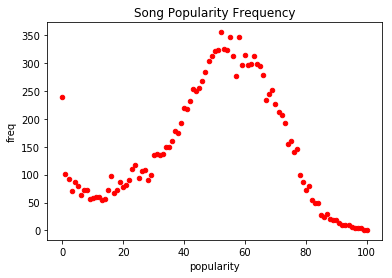

In [42]:
#graph popularity freq
#pop
##x_axis = np.arange(0, len_value, 20)
##y_axis = song_pop["freq"]
##plt.plot(x_axis, y_axis)
##plt.show()
song_pop.plot(kind='scatter',x='popularity',y='freq',color='red')
plt.title("Song Popularity Frequency")
plt.show()

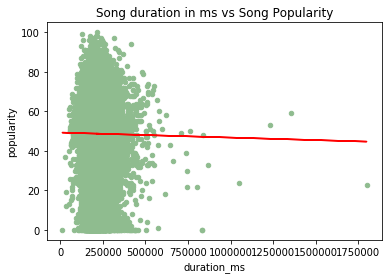

In [43]:
# study about song_popularity & duration
# 100 = max value of song_popularity
dura_max_value = song_data["song_duration_ms"].max() #1799346 29.99min  , 30min = 1,800,000
dura_min_value = song_data["song_duration_ms"].min() #12000   0.2min   , 1min = 60,000
dura_len_value = len(song_data["song_duration_ms"].unique())  #11771 

song_dura = song_data[["song_duration_ms", "song_popularity"]]
song_dura = song_dura.rename(columns={"song_duration_ms":"duration_ms","song_popularity":"popularity" })

# defining x and y variables to plot linear regression
x = song_dura['duration_ms']
y = song_dura['popularity']

# linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

#song_dura
#song_dura.plot(kind='scatter',x='duration_ms',y='popularity',color='red')
#plt.show()

# plotting data
song_dura.plot(kind='scatter',x='duration_ms',y='popularity',color='darkseagreen')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title("Song duration in ms vs Song Popularity")
plt.show()


In [14]:
print(slope, intercept, r_value, p_value, std_err)

-2.5458703825657706e-06 49.30733838327257 -0.007787737876276933 0.34139618157165663 2.6758060004893487e-06


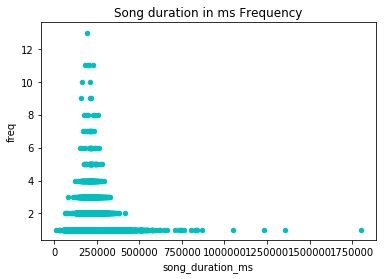

In [44]:
# freq of song_duration_ms
freq = song_data["song_duration_ms"].value_counts()
s = song_data["song_duration_ms"].value_counts() 
song_dura = pd.DataFrame({'song_duration_ms':s.index, 'freq':s.values})
song_dura.plot(kind='scatter',x='song_duration_ms',y='freq',color='c')
plt.title("Song duration in ms Frequency")
plt.show()

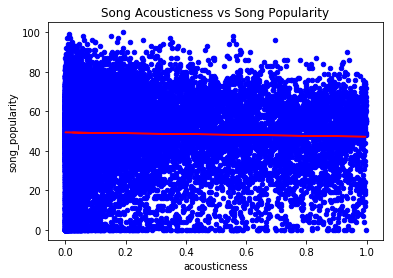

In [45]:
# defining x and y variables to plot linear regression
x = song_data['acousticness']
y = song_data['song_popularity']

# linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
song_data.plot(kind='scatter',x='acousticness',y='song_popularity',color='blue')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title("Song Acousticness vs Song Popularity")
plt.show()

In [17]:
print(slope, intercept, r_value, p_value, std_err)

-2.16110826959434 49.334355298625134 -0.03161362240912524 0.00011197035078351836 0.5592782927901581


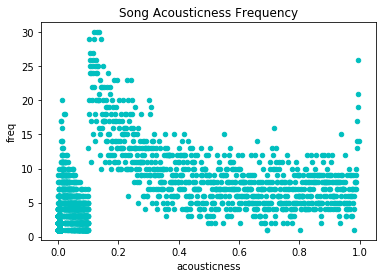

In [46]:
# freq of acousticness
freq = song_data["acousticness"].value_counts()
s = song_data["acousticness"].value_counts() 
song_acu = pd.DataFrame({'acousticness':s.index, 'freq':s.values})
song_acu.plot(kind='scatter',x='acousticness',y='freq',color='c')
plt.title("Song Acousticness Frequency")
plt.show()

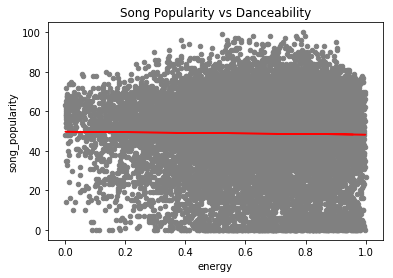

In [47]:
x = song_data['energy']
y = song_data['song_popularity']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

song_data.plot(kind='scatter',x='energy',y='song_popularity',color='grey')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title("Song Popularity vs Danceability")
plt.show()

In [20]:
print(slope, intercept, r_value, p_value, std_err)

-1.5182787243609148 49.721279249283086 -0.016521327334446126 0.043541285485526895 0.7521251673880973


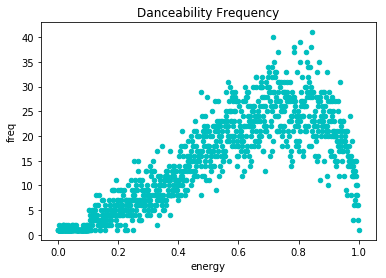

In [48]:
# freq of energy
freq = song_data["energy"].value_counts()
s = song_data["energy"].value_counts() 
song_energy = pd.DataFrame({'energy':s.index, 'freq':s.values})
song_energy.plot(kind='scatter',x='energy',y='freq',color='c')
plt.title("Danceability Frequency")
plt.show()

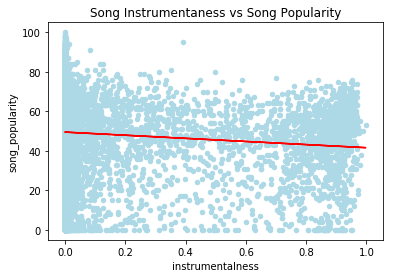

In [49]:
x = song_data['instrumentalness']
y = song_data['song_popularity']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
song_data.plot(kind='scatter',x='instrumentalness',y='song_popularity',color='lightblue')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title("Song Instrumentaness vs Song Popularity")
plt.show()

In [23]:
print(slope, intercept, r_value, p_value, std_err)

-7.883336712072269 49.47566143278232 -0.0930117809854729 4.823246518155469e-30 0.6907616063561927


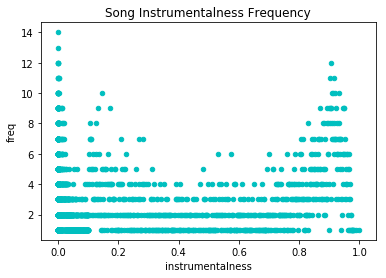

In [50]:
# freq of instrumentalness
freq = song_data["instrumentalness"].value_counts()
s = song_data["instrumentalness"].value_counts() 
song_inst = pd.DataFrame({'instrumentalness':s.index, 'freq':s.values})

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

song_inst = song_inst[song_inst.instrumentalness > 0]
song_inst.plot(kind='scatter',x='instrumentalness',y='freq',color='c')
plt.title("Song Instrumentalness Frequency")
plt.show()

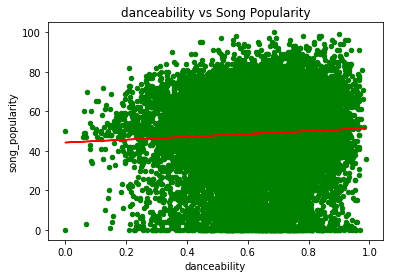

In [51]:
x = song_data['danceability']
y = song_data['song_popularity']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
song_data.plot(kind='scatter',x='danceability',y='song_popularity',color='green')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title("danceability vs Song Popularity")
plt.show()

In [26]:
print(slope, intercept, r_value, p_value, std_err)

7.277228839951984 44.205245214267904 0.05644851899988644 5.142530566359798e-12 1.053569718132224


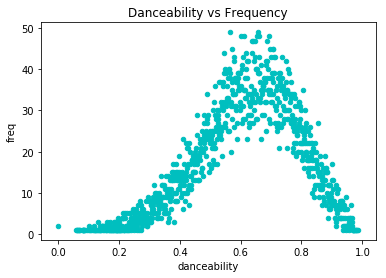

In [52]:
# freq of danceability
freq = song_data["danceability"].value_counts()
s = song_data["danceability"].value_counts() 
song_dance = pd.DataFrame({'danceability':s.index, 'freq':s.values})
song_dance.plot(kind='scatter',x='danceability',y='freq',color='c')
plt.title("Danceability vs Frequency")
plt.show()

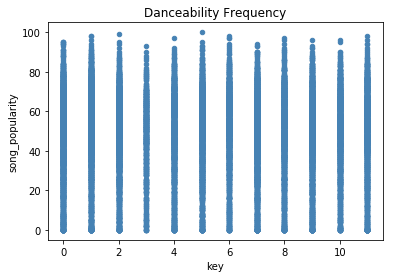

In [53]:
song_data.plot(kind='scatter',x='key',y='song_popularity',color='steelblue')
plt.title("Danceability Frequency")
plt.show()

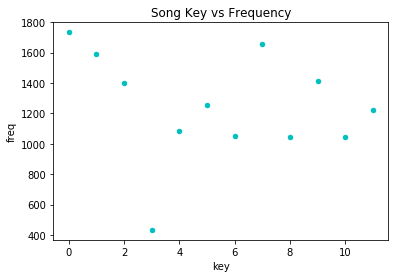

In [54]:
# freq of key
freq = song_data["key"].value_counts()
s = song_data["key"].value_counts() 
song_key = pd.DataFrame({'key':s.index, 'freq':s.values})
song_key.plot(kind='scatter',x='key',y='freq',color='c')
plt.title("Song Key vs Frequency")
plt.show()

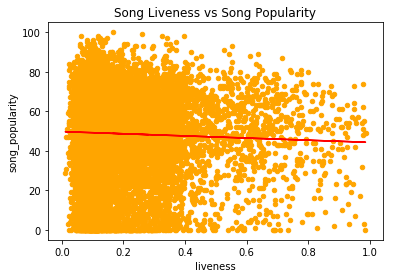

In [55]:
x = song_data['liveness']
y = song_data['song_popularity']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

song_data.plot(kind='scatter',x='liveness',y='song_popularity',color='orange')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title("Song Liveness vs Song Popularity")
plt.show()

In [31]:
print(slope, intercept, r_value, p_value, std_err)

-5.430337311228573 49.72987761510401 -0.038671114822271695 2.289201716278239e-06 1.1485713207436168


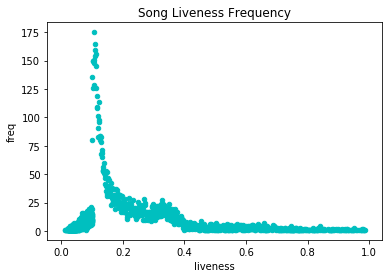

In [56]:
# freq of liveness
freq = song_data["liveness"].value_counts()
s = song_data["liveness"].value_counts() 
song_live = pd.DataFrame({'liveness':s.index, 'freq':s.values})
song_live.plot(kind='scatter',x='liveness',y='freq',color='c')
plt.title("Song Liveness Frequency")
plt.show()

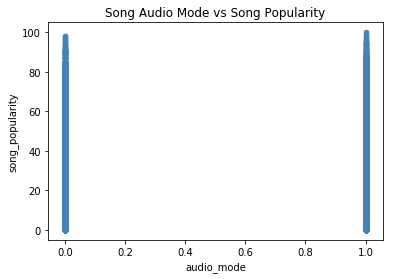

In [57]:
song_data.plot(kind='scatter',x='audio_mode',y='song_popularity',color='steelblue')
plt.title("Song Audio Mode vs Song Popularity")
plt.show()

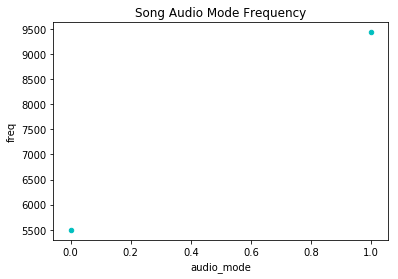

In [58]:
# freq of audio_mode
freq = song_data["audio_mode"].value_counts()
s = song_data["audio_mode"].value_counts() 
song_audio = pd.DataFrame({'audio_mode':s.index, 'freq':s.values})
song_audio.plot(kind='scatter',x='audio_mode',y='freq',color='c')
plt.title("Song Audio Mode Frequency")
plt.show()

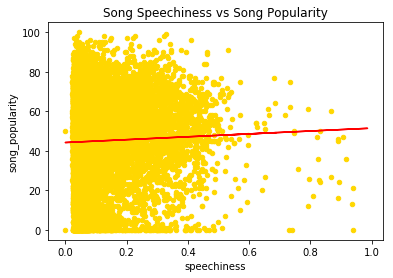

In [59]:
x = song_data['danceability']
y = song_data['song_popularity']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

song_data.plot(kind='scatter',x='speechiness',y='song_popularity',color='gold')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title("Song Speechiness vs Song Popularity")
plt.show()

In [36]:
print(slope, intercept, r_value, p_value, std_err)

7.277228839951984 44.205245214267904 0.05644851899988644 5.142530566359798e-12 1.053569718132224


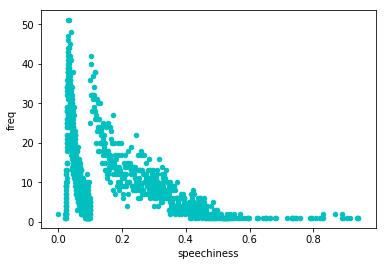

In [37]:
# freq of speechiness
freq = song_data["speechiness"].value_counts()
s = song_data["speechiness"].value_counts() 
song_speech = pd.DataFrame({'speechiness':s.index, 'freq':s.values})
song_speech.plot(kind='scatter',x='speechiness',y='freq',color='c')
plt.title("Song Speechness Frequency")
plt.show()

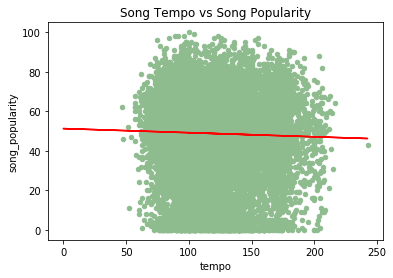

In [60]:
x = song_data['tempo']
y = song_data['song_popularity']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

# cut data(removing songs with tempo of 0)
song_tempo = song_data[(song_data.tempo > 0)]
song_tempo.plot(kind='scatter',x='tempo',y='song_popularity',color='darkseagreen')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title("Song Tempo vs Song Popularity")
plt.show()

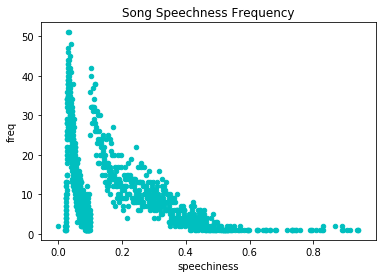

In [62]:
# freq of speechiness
freq = song_data["speechiness"].value_counts()
s = song_data["speechiness"].value_counts() 
song_speech = pd.DataFrame({'speechiness':s.index, 'freq':s.values})
song_speech.plot(kind='scatter',x='speechiness',y='freq',color='c')
plt.title("Song Speechness Frequency")
plt.show()

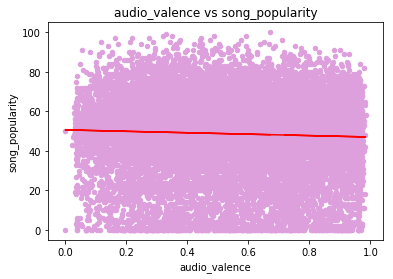

In [61]:
#audio_valence
x = song_data['audio_valence']
y = song_data['song_popularity']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

song_data.plot(kind='scatter',x='audio_valence',y='song_popularity',color='plum')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title("audio_valence vs song_popularity")
plt.show()

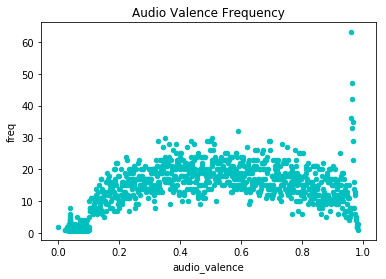

In [63]:
# freq of audio_valence
freq = song_data["audio_valence"].value_counts()
s = song_data["audio_valence"].value_counts() 
song_valence = pd.DataFrame({'audio_valence':s.index, 'freq':s.values})
song_valence.plot(kind='scatter',x='audio_valence',y='freq',color='c')
plt.title("Audio Valence Frequency")
plt.show()

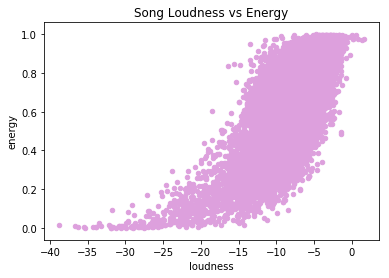

In [64]:
#loudness vs energy
song_data.plot(kind='scatter',x='loudness',y='energy',color='plum')
plt.title("Song Loudness vs Energy")
plt.show()

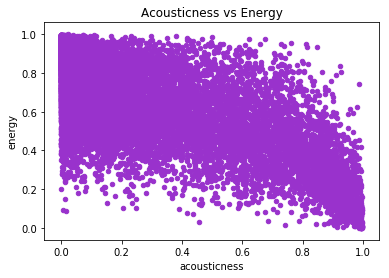

In [65]:
#acousticness vs energy
song_data.plot(kind='scatter',x='acousticness',y='energy',color='darkorchid')
plt.title("Acousticness vs Energy")
plt.show()